In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Regression':
  os.chdir(r'/Users/apolloos/CS_5805(Machine_learning)/man0ZZZ.github.io/posts/Regression')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/yz/9_3w8_1j16g4r8mnf_4c_6pm0000gn/T/ipykernel_18135/1199816749.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap.py": 1694439058.586277, "/Users/apolloos/anaconda3/lib/python3.11/importlib/_bootstrap_external.py": 1694439058.588179, "/Users/apolloos/anaconda3/lib/python3.11/zipimport.py": 1694439057.809952, "/Users/apolloos/anaconda3/lib/python3.11/codecs.py": 1694439057.572709, "/Users/apolloos/anaconda3/lib/python3.11/encodings/aliases.py": 1694439058.134947, "/Users/apolloos/anaconda3/lib/python3.11/encodings/__init__.py": 1694439058.132963, "/Users/apolloos/anaconda3/lib/python3.11/encodings/utf_8.py": 1694439058.359777, "/Users/apolloos/anaconda3/lib/python3.11/abc.py": 1694439057.54054, "/Users/apolloos/anaconda3/lib/python3.11/io.py": 1694439057.639787, "/Users/apolloos/anaconda3/lib/python3.11/stat.py": 1694439057.744279, "/Users/apolloos/anaconda3/lib/python3.11/_collections_abc.py": 1694439057.519174, "/Users/apolloos/anaconda3/lib/python3.11/genericpath.py": 1694439057.614934, "/Users/apolloos/anaconda3/lib/python3.11/posi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#| echo: false
df = pd.DataFrame(pd.read_csv('./Position_Salaries.csv'))
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Text(0, 0.5, 'Salary')

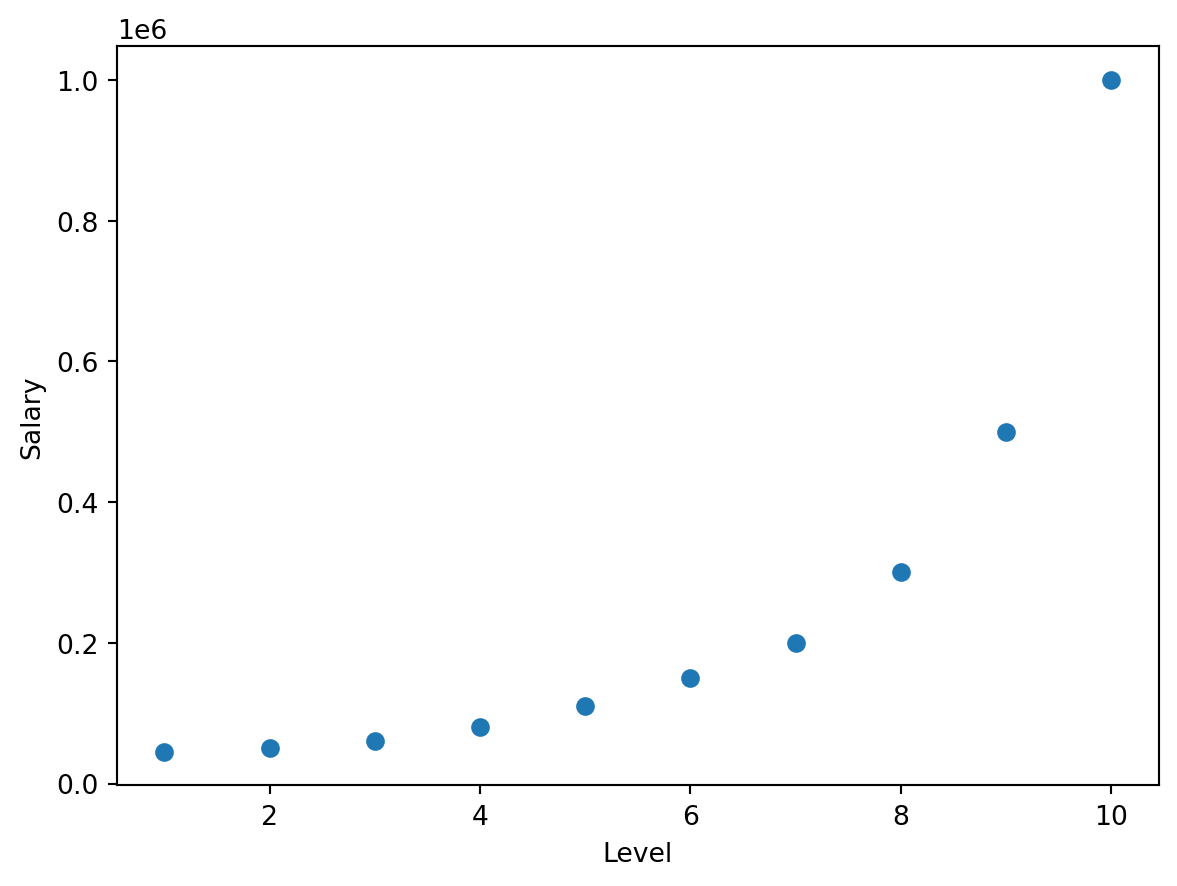

In [4]:
plt.scatter(df['Level'], df['Salary'])
plt.xlabel("Level")
plt.ylabel("Salary")

In [5]:
#fit linear regression
from sklearn.linear_model import LinearRegression
y=df.iloc[:,-1].values
X=df.iloc[:,-2:-1].values
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

Text(8.5, 0.75, 'R$^2$: 0.67')

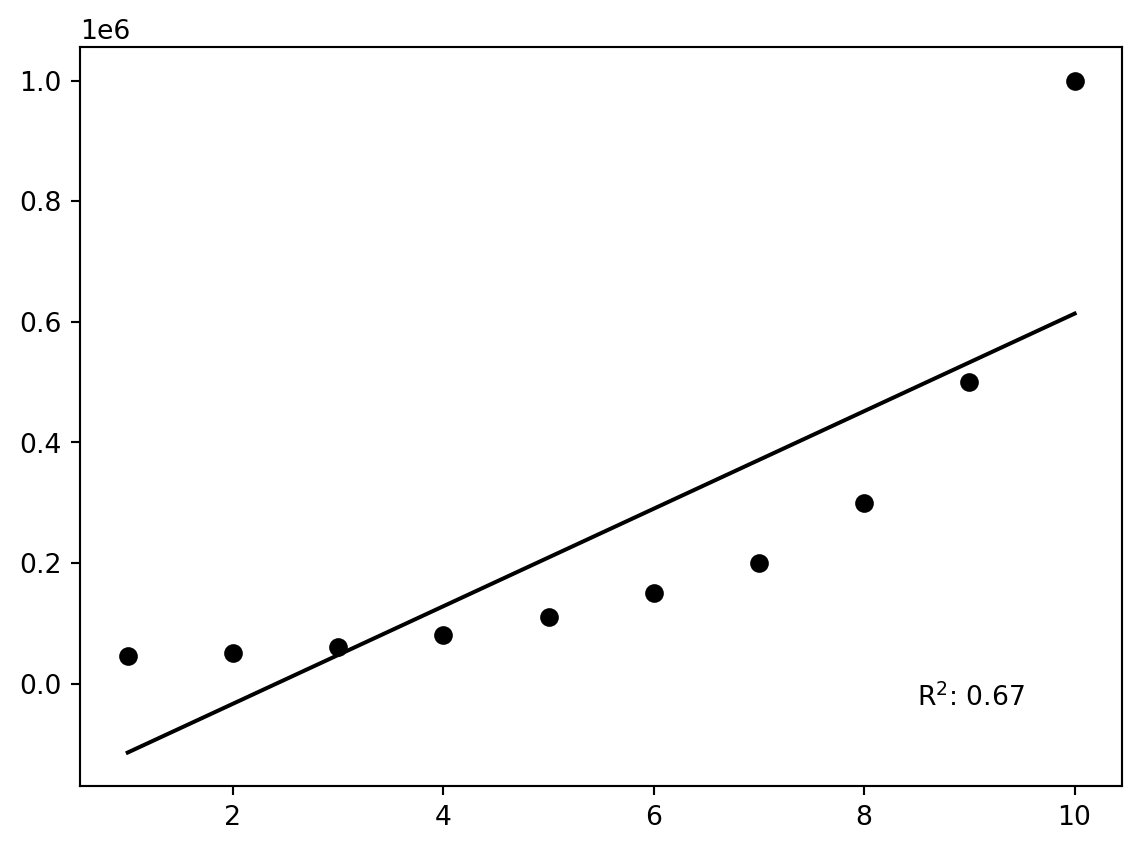

In [6]:
y_pred = lin_reg.predict(X)

def r2(y, y_pred):
  tss=0
  rss=0
  mean_true = sum(y) / len(y)
  for true, pred in zip(y, y_pred):
    tss+=(true-mean_true)**2
    rss+=(true-pred)**2
  return 1 - (rss / tss)

r_sq = r2(y, y_pred)
plt.scatter(df.Level, df.Salary, color='black')
plt.plot(X, lin_reg.predict(X), color='black')
plt.text(8.5, 0.75, rf'R$^2$: {r_sq:.2f}', fontsize=10, verticalalignment='top')

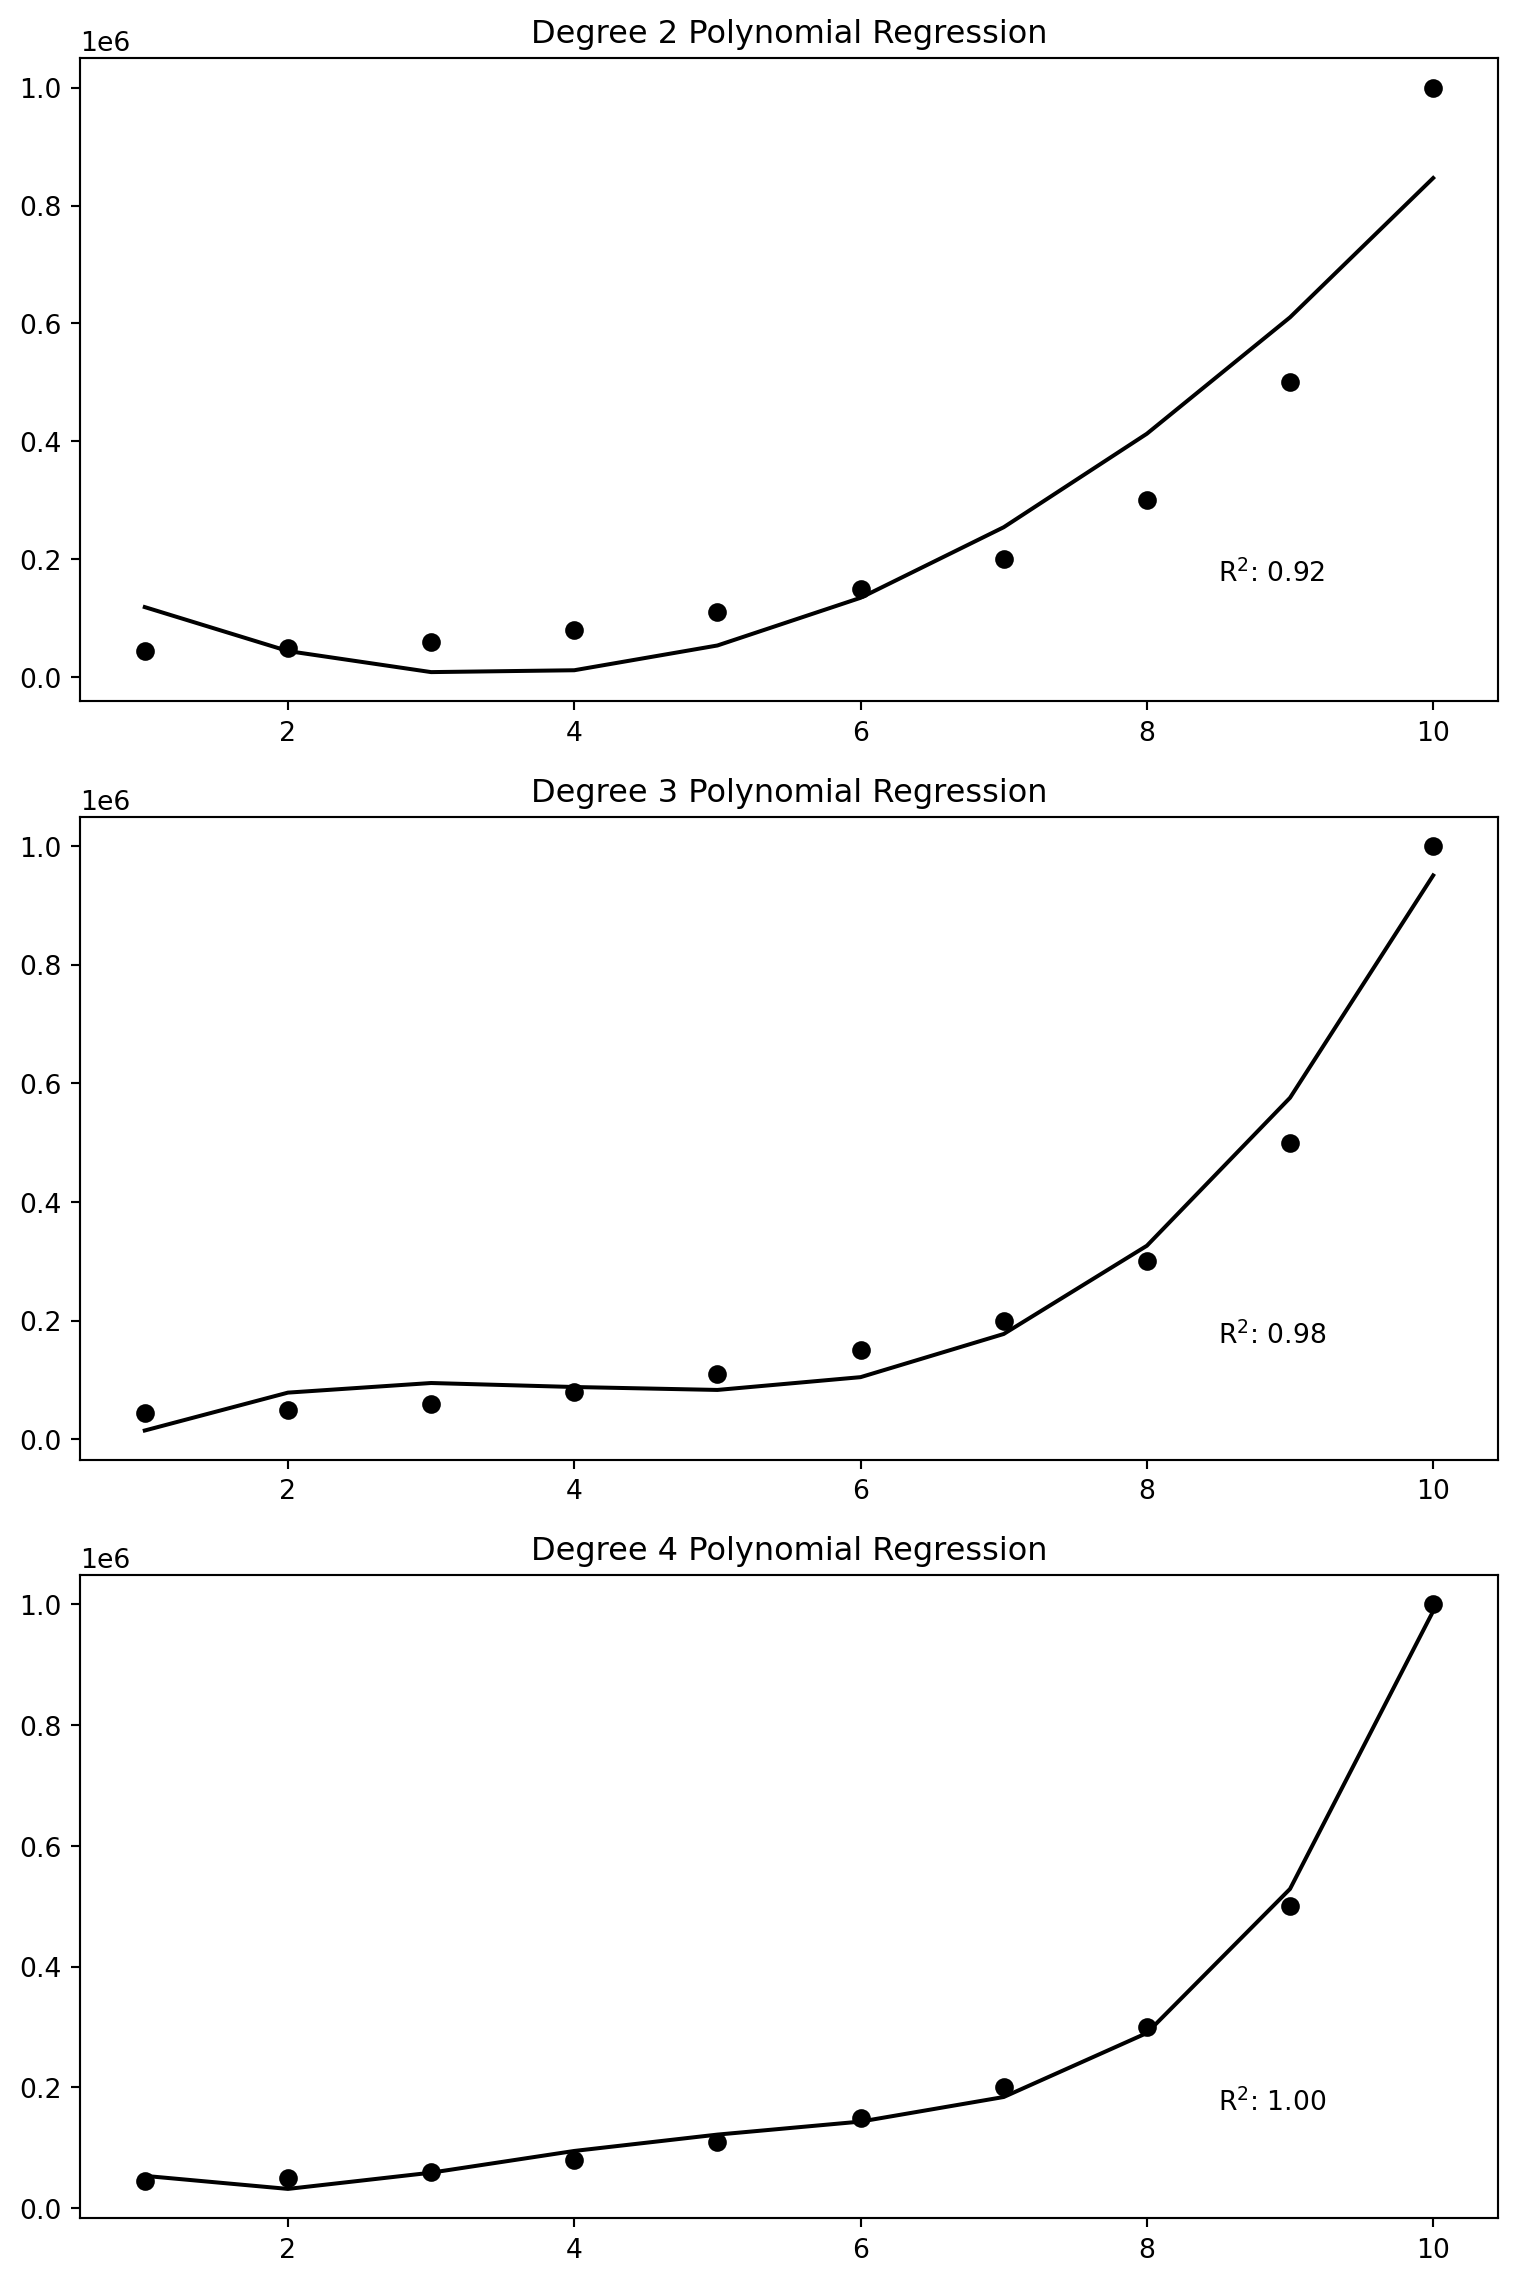

In [7]:
from sklearn.preprocessing import PolynomialFeatures

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# polynomial regression plots with different degrees
for degree, ax in zip([2, 3, 4], axs):
    # Polynomial features
    poly_feat = PolynomialFeatures(degree=degree)
    X_poly = poly_feat.fit_transform(X)
    
    # Linear regression
    linreg_for_polyreg = LinearRegression()
    linreg_for_polyreg.fit(X_poly, y)
    
    # Predicted y values
    y_poly_pred = linreg_for_polyreg.predict(X_poly)
    
    # Plot
    ax.scatter(X, y, color='black')
    ax.plot(X, y_poly_pred, color='black')
    r_sq=r2(y, y_poly_pred)
    ax.set_title(f'Degree {degree} Polynomial Regression')
    ax.text(8.5, 0.2e6, rf'R$^2$: {r_sq:.2f}', fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

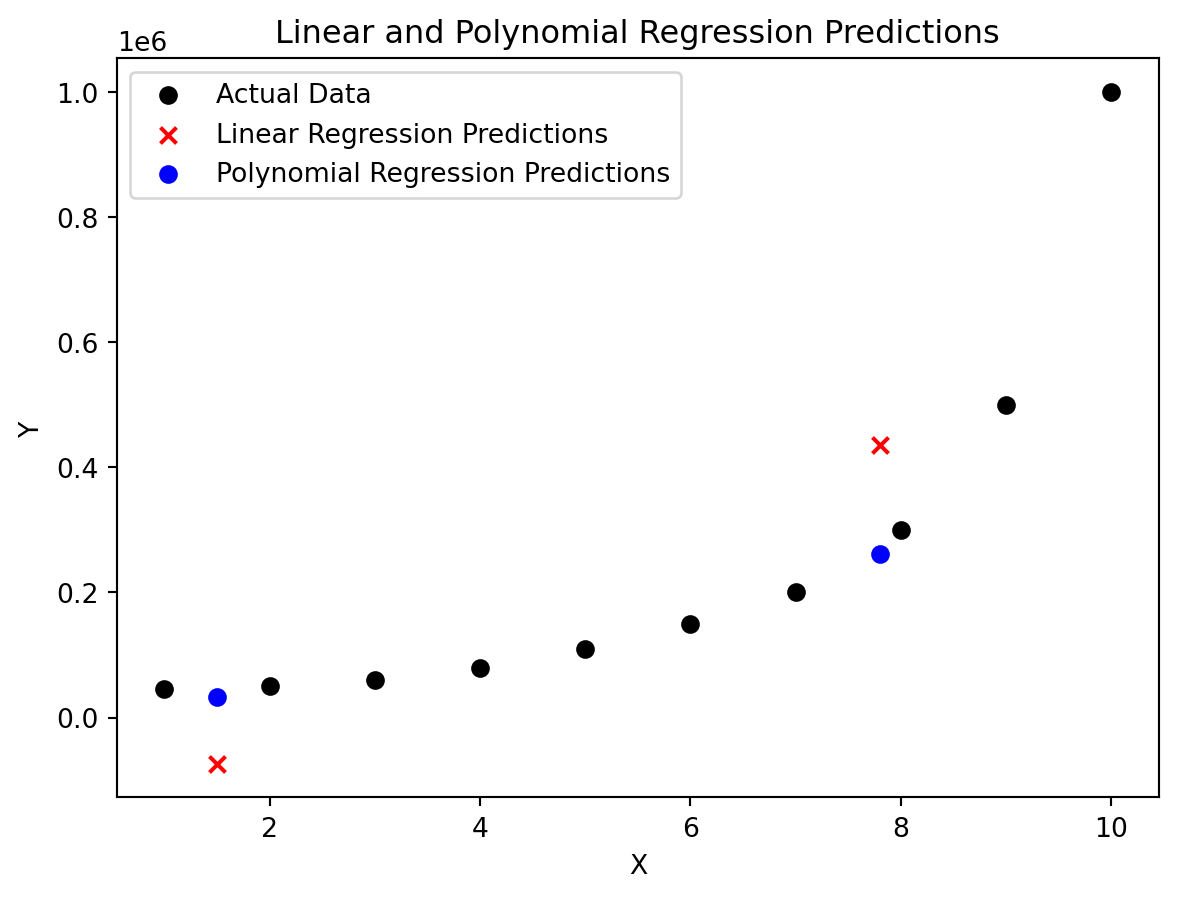

In [8]:
x_test=[1.5, 7.8]

#plotting the predicted points
plt.scatter(X, y, label='Actual Data', color='black')
plt.scatter(x_test, lin_reg.predict([[1.5], [7.8]]), label='Linear Regression Predictions', marker='x', color='red')
plt.scatter(x_test, linreg_for_polyreg.predict(poly_feat.fit_transform([[1.5],[7.8]])), label='Polynomial Regression Predictions', marker='o', color='blue')

plt.title('Linear and Polynomial Regression Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()